# Import Datasets

In [2]:
import numpy as np 
import pandas as pd
import copy

hep_url = 'https://raw.githubusercontent.com/sierrasgit/COMP551/main/hepatitis.csv'
hepatitis_df = pd.read_csv(hep_url)

cancer_url = 'https://raw.githubusercontent.com/sierrasgit/COMP551/main/breast_cancer_wisconsin.csv'
breast_cancer_df = pd.read_csv(cancer_url)


## View Data Entries

In [3]:
hepatitis_df.head()

,Class,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER_BIG,LIVER_FIRM,SPLEEN_PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK_PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,?,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,?,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,?,1
3,2,31,1,?,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,200,4.0,?,1


In [4]:
breast_cancer_df.head()

,id,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


## View how many rows contain '?' entries

In [5]:
hepatitis_df.isin(['?']).sum(axis=0)

Class               0
AGE                 0
SEX                 0
STEROID             1
ANTIVIRALS          0
FATIGUE             1
MALAISE             1
ANOREXIA            1
LIVER_BIG          10
LIVER_FIRM         11
SPLEEN_PALPABLE     5
SPIDERS             5
ASCITES             5
VARICES             5
BILIRUBIN           6
ALK_PHOSPHATE      29
SGOT                4
ALBUMIN            16
PROTIME            67
HISTOLOGY           0
dtype: int64

Due to the high number of '?' entries within the Hepatitis data set (about 50%), we cannot delete all rows containing '?' entries, as we will be left with very few instances. Will need to conduct further analysis while cleaning this dataset.

In [6]:
breast_cancer_df.isin(['?']).sum(axis=0)

id                              0
Clump_Thickness                 0
Uniformity_of_Cell_Size         0
Uniformity_of_Cell_Shape        0
Marginal_Adhesion               0
Single_Epithelial_Cell_Size     0
Bare_Nuclei                    16
Bland_Chromatin                 0
Normal_Nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64

## Cleaning the Breast Cancer Dataset

In [7]:
clean_bc_df = breast_cancer_df[~breast_cancer_df.eq('?').any(1)]

In [8]:
clean_bc_df.isin(['?']).sum(axis=0)

id                             0
Clump_Thickness                0
Uniformity_of_Cell_Size        0
Uniformity_of_Cell_Shape       0
Marginal_Adhesion              0
Single_Epithelial_Cell_Size    0
Bare_Nuclei                    0
Bland_Chromatin                0
Normal_Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

In [9]:
clean_bc_df.nunique()

id                             630
Clump_Thickness                 10
Uniformity_of_Cell_Size         10
Uniformity_of_Cell_Shape        10
Marginal_Adhesion               10
Single_Epithelial_Cell_Size     10
Bare_Nuclei                     10
Bland_Chromatin                 10
Normal_Nucleoli                 10
Mitoses                          9
Class                            2
dtype: int64

Observe there are no entries with Mitoses = 9

In [10]:
clean_bc_df.Mitoses.unique()

array([ 1,  5,  4,  2,  3,  7, 10,  8,  6])

Observe there are 630 ids and 683 rows - must have duplicate ids.



In [11]:
clean_bc_df.shape

(683, 11)

In [12]:
clean_bc_df[clean_bc_df.duplicated(subset='id',keep=False)].sort_values(by=['id'])

,id,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
267,320675,3,3,5,2,3,10,7,1,1,4
272,320675,3,3,5,2,3,10,7,1,1,4
269,385103,1,1,1,1,2,1,3,1,1,2
575,385103,5,1,2,1,2,1,3,1,1,2
271,411453,5,1,1,1,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
561,1321942,5,1,1,1,2,1,3,1,1,2
660,1339781,1,1,1,1,2,1,2,1,1,2
661,1339781,4,1,1,1,2,1,3,1,1,2
672,1354840,2,1,1,1,2,1,3,1,1,2


Due to the nature of the data, the ids of the patients can be duplicated as the data was collected in groups. Therefore, the rows containing duplicated id values will be kept.

However, since the id values are not needed in the classification process, we will remove them from the dataset, and work with 683 rows and 9 attributes.

In [13]:
del clean_bc_df['id']

'Bare_Nuclei' coded as an object. Convert to int.

In [14]:
clean_bc_df['Bare_Nuclei'] = pd.to_numeric(clean_bc_df['Bare_Nuclei'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [15]:
clean_bc_df.dtypes

Clump_Thickness                int64
Uniformity_of_Cell_Size        int64
Uniformity_of_Cell_Shape       int64
Marginal_Adhesion              int64
Single_Epithelial_Cell_Size    int64
Bare_Nuclei                    int64
Bland_Chromatin                int64
Normal_Nucleoli                int64
Mitoses                        int64
Class                          int64
dtype: object

#### Now, we will look at the relative proportions of the classes:

In [16]:
# Benign Tumors
benign = clean_bc_df[clean_bc_df['Class']==2]
# Malignant Tumors
malignant = clean_bc_df[clean_bc_df['Class']==4]

65% of the instances are classified as Benign Tumors and 35% of the instances are classified as Malignant Tumors.

In [17]:
benign.shape

(444, 10)

In [18]:
malignant.shape

(239, 10)

In [19]:
import seaborn as sb
import matplotlib.pyplot as plt

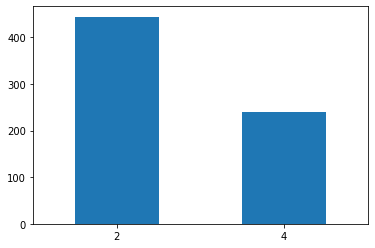

In [20]:
pd.value_counts(clean_bc_df['Class']).plot.bar(x='Class',rot=0)
plt.show()

## Exploratory Data Analysis of the Breast Cancer Dataset

From the below correlation matrix, we can see that 'Uniformity of Cell Size','Uniformity of Cell Shape' and 'Bare_Nuclei' are the most highly correlated with Class. As well, we can see that 'Mitoses' is the least correlated with Class.

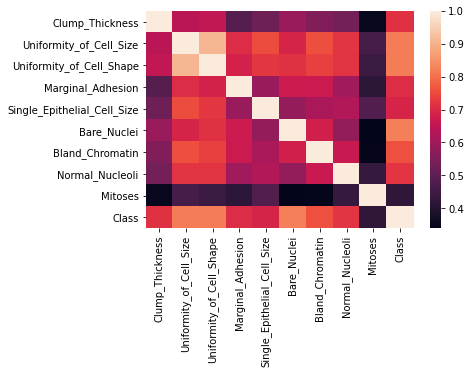

In [21]:
sb.heatmap(clean_bc_df.corr())
plt.show()

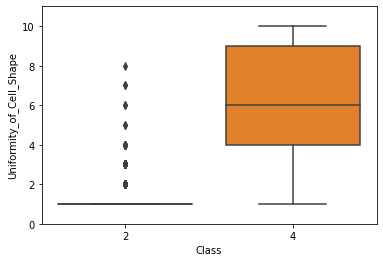

In [22]:
box1 = sb.boxplot(x="Class", y="Uniformity_of_Cell_Shape", data=clean_bc_df)
box1.set(ylim=(0,11))
plt.show()

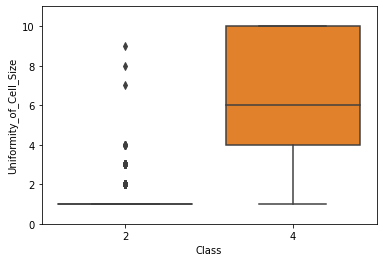

In [23]:
box2 = sb.boxplot(x="Class", y="Uniformity_of_Cell_Size", data=clean_bc_df)
box2.set(ylim=(0,11))
plt.show()

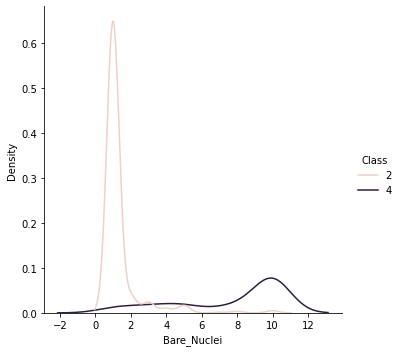

In [24]:
sb.displot(x='Bare_Nuclei',hue='Class',kind='kde',data=clean_bc_df)
plt.show()

## Cleaning the Hepatitis Dataset

As can be seen from the output below, most of the missing values come from the 'PROTIME' attribute (67/155). Therefore, we will remove this attribute from our analysis since it would remove too many rows, and we do not have enough information from this attribute to make valuable classification connections (how PROTIME relates to Class).

In [25]:
hepatitis_df.isin(['?']).sum(axis=0)

Class               0
AGE                 0
SEX                 0
STEROID             1
ANTIVIRALS          0
FATIGUE             1
MALAISE             1
ANOREXIA            1
LIVER_BIG          10
LIVER_FIRM         11
SPLEEN_PALPABLE     5
SPIDERS             5
ASCITES             5
VARICES             5
BILIRUBIN           6
ALK_PHOSPHATE      29
SGOT                4
ALBUMIN            16
PROTIME            67
HISTOLOGY           0
dtype: int64

In [26]:
del hepatitis_df['PROTIME']

As well, we notice that the 'ALK_PHOSPHATE' attribute contains 29 missing entries. After research, it is noticed that this may not be a necessary attribute in conducting our analysis (see report).
Therefore, we will also consider removing the attribute 'ALK_PHOSPHATE'.

Now, we can delete the rest of the rows that contain missing values.

In [27]:
hepatitis_df_2 = hepatitis_df.loc[:,hepatitis_df.columns!='ALK_PHOSPHATE']

In [28]:
clean_hep_df_1 = hepatitis_df[~hepatitis_df.eq('?').any(1)]

In [29]:
clean_hep_df_2 = hepatitis_df_2[~hepatitis_df_2.eq('?').any(1)]

Ensure that all columns are coded to the appropriate type

In [30]:
clean_hep_df_1.dtypes

Class               int64
AGE                 int64
SEX                 int64
STEROID            object
ANTIVIRALS          int64
FATIGUE            object
MALAISE            object
ANOREXIA           object
LIVER_BIG          object
LIVER_FIRM         object
SPLEEN_PALPABLE    object
SPIDERS            object
ASCITES            object
VARICES            object
BILIRUBIN          object
ALK_PHOSPHATE      object
SGOT               object
ALBUMIN            object
HISTOLOGY           int64
dtype: object

In [31]:
clean_hep_df_1['STEROID'] = pd.to_numeric(clean_hep_df_1['STEROID'])
clean_hep_df_1['FATIGUE'] = pd.to_numeric(clean_hep_df_1['FATIGUE'])
clean_hep_df_1['MALAISE'] = pd.to_numeric(clean_hep_df_1['MALAISE'])
clean_hep_df_1['ANOREXIA'] = pd.to_numeric(clean_hep_df_1['ANOREXIA'])
clean_hep_df_1['LIVER_BIG'] = pd.to_numeric(clean_hep_df_1['LIVER_BIG'])
clean_hep_df_1['LIVER_FIRM'] = pd.to_numeric(clean_hep_df_1['LIVER_FIRM'])
clean_hep_df_1['SPLEEN_PALPABLE'] = pd.to_numeric(clean_hep_df_1['SPLEEN_PALPABLE'])
clean_hep_df_1['SPIDERS'] = pd.to_numeric(clean_hep_df_1['SPIDERS'])
clean_hep_df_1['ASCITES'] = pd.to_numeric(clean_hep_df_1['ASCITES'])
clean_hep_df_1['VARICES'] = pd.to_numeric(clean_hep_df_1['VARICES'])
clean_hep_df_1['BILIRUBIN'] = pd.to_numeric(clean_hep_df_1['BILIRUBIN'])
clean_hep_df_1['ALK_PHOSPHATE'] = pd.to_numeric(clean_hep_df_1['ALK_PHOSPHATE'])
clean_hep_df_1['SGOT'] = pd.to_numeric(clean_hep_df_1['SGOT'])
clean_hep_df_1['ALBUMIN'] = pd.to_numeric(clean_hep_df_1['ALBUMIN'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [32]:
clean_hep_df_2['STEROID'] = pd.to_numeric(clean_hep_df_2['STEROID'])
clean_hep_df_2['FATIGUE'] = pd.to_numeric(clean_hep_df_2['FATIGUE'])
clean_hep_df_2['MALAISE'] = pd.to_numeric(clean_hep_df_2['MALAISE'])
clean_hep_df_2['ANOREXIA'] = pd.to_numeric(clean_hep_df_2['ANOREXIA'])
clean_hep_df_2['LIVER_BIG'] = pd.to_numeric(clean_hep_df_2['LIVER_BIG'])
clean_hep_df_2['LIVER_FIRM'] = pd.to_numeric(clean_hep_df_2['LIVER_FIRM'])
clean_hep_df_2['SPLEEN_PALPABLE'] = pd.to_numeric(clean_hep_df_2['SPLEEN_PALPABLE'])
clean_hep_df_2['SPIDERS'] = pd.to_numeric(clean_hep_df_2['SPIDERS'])
clean_hep_df_2['ASCITES'] = pd.to_numeric(clean_hep_df_2['ASCITES'])
clean_hep_df_2['VARICES'] = pd.to_numeric(clean_hep_df_2['VARICES'])
clean_hep_df_2['BILIRUBIN'] = pd.to_numeric(clean_hep_df_2['BILIRUBIN'])
clean_hep_df_2['SGOT'] = pd.to_numeric(clean_hep_df_2['SGOT'])
clean_hep_df_2['ALBUMIN'] = pd.to_numeric(clean_hep_df_2['ALBUMIN'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [33]:
clean_hep_df_1.dtypes

Class                int64
AGE                  int64
SEX                  int64
STEROID              int64
ANTIVIRALS           int64
FATIGUE              int64
MALAISE              int64
ANOREXIA             int64
LIVER_BIG            int64
LIVER_FIRM           int64
SPLEEN_PALPABLE      int64
SPIDERS              int64
ASCITES              int64
VARICES              int64
BILIRUBIN          float64
ALK_PHOSPHATE        int64
SGOT                 int64
ALBUMIN            float64
HISTOLOGY            int64
dtype: object

In [34]:
clean_hep_df_2.dtypes

Class                int64
AGE                  int64
SEX                  int64
STEROID              int64
ANTIVIRALS           int64
FATIGUE              int64
MALAISE              int64
ANOREXIA             int64
LIVER_BIG            int64
LIVER_FIRM           int64
SPLEEN_PALPABLE      int64
SPIDERS              int64
ASCITES              int64
VARICES              int64
BILIRUBIN          float64
SGOT                 int64
ALBUMIN            float64
HISTOLOGY            int64
dtype: object

In [35]:
clean_hep_df_1.shape

(112, 19)

In [36]:
clean_hep_df_2.shape

(129, 18)

If we removed the rows containing missing entries without removing any of the attributes, we would have removed 75 instances. By removing the 'PROTIME' and 'ALK_PHOSPHATE' attributes before removing the missing rows, we removed only 26 instances. Therefore, saving 49 instances or 31.6% of the data. By removing only 'PROTIME', we still save 32 entries or 20.6% of the data.

In [37]:
# Class = 'LIVE'
live1 = clean_hep_df_1[clean_hep_df_1['Class']==2]
# Class = 'DIE'
die1 = clean_hep_df_1[clean_hep_df_1['Class']==1]

In [38]:
die1.shape

(19, 19)

In [39]:
live1.shape

(93, 19)

In [40]:
# Class = 'LIVE'
live2 = clean_hep_df_2[clean_hep_df_2['Class']==2]
# Class = 'DIE'
die2 = clean_hep_df_2[clean_hep_df_2['Class']==1]

In [41]:
die2.shape

(24, 18)

In [42]:
live2.shape

(105, 18)

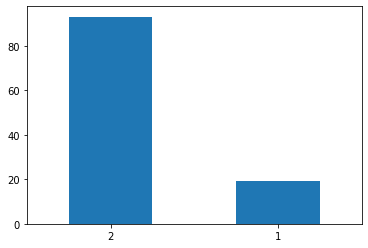

In [43]:
pd.value_counts(clean_hep_df_1['Class']).plot.bar(x='Class',rot=0)
plt.show()

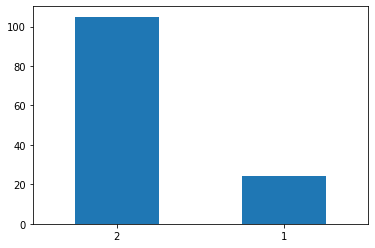

In [44]:
pd.value_counts(clean_hep_df_2['Class']).plot.bar(x='Class',rot=0)
plt.show()

## Exploratory Data Analysis of the Hepatitis Dataset

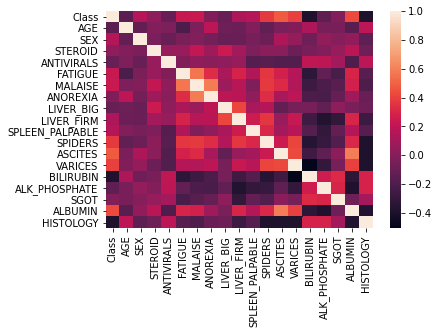

In [45]:
sb.heatmap(clean_hep_df_1.corr())
plt.show()

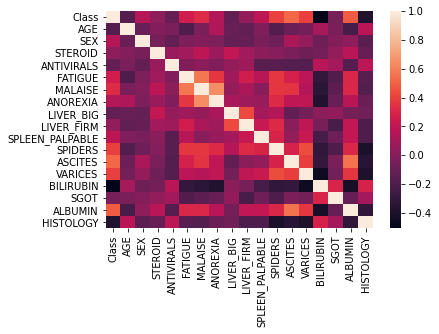

In [46]:
sb.heatmap(clean_hep_df_2.corr())
plt.show()

ASCITES most highly correlated, other features not very correlated
Notice: ALK_PHOSOHATE not correlated with CLASS

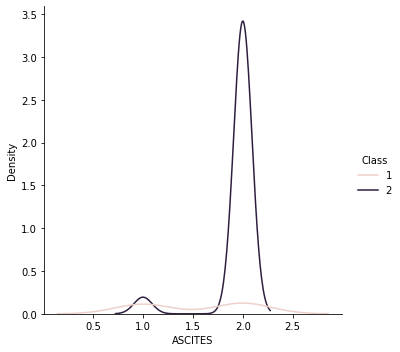

In [47]:
sb.displot(x='ASCITES',hue='Class',kind='kde',data=clean_hep_df_1)
plt.show()

In [48]:
# Continuous Variables
df = clean_hep_df_1.loc[:, clean_hep_df_1.columns.difference(['SEX','STEROID','ANOREXIA','HISTOLOGY','VARICES','ASCITES','MALAISE','ANTIVIRALS','FATIGUE','LIVER_BIG','LIVER_FIRM','SPIDERS','SPLEEN_PALPABLE'])].groupby('Class').aggregate(['median','mean','std'])
display(df)

AGE                        ...   SGOT                      
      median       mean        std  ... median       mean        std
Class                               ...                             
1         47  45.210526   8.456286  ...     68  80.210526  61.162424
2         38  40.376344  12.654192  ...     55  78.290323  70.512346

[2 rows x 15 columns]

In [49]:
# Categorical Variables
cat_hep_df = clean_hep_df_1[["Class","ANOREXIA", "ANTIVIRALS","ASCITES","FATIGUE","HISTOLOGY","LIVER_BIG","LIVER_FIRM","MALAISE","SEX","SPIDERS","SPLEEN_PALPABLE","STEROID","VARICES"]]
cat_hep_freq_table = cat_hep_df.apply(lambda x: x.value_counts()/cat_hep_df.shape[0])
cat_hep_freq_table

,Class,ANOREXIA,ANTIVIRALS,ASCITES,FATIGUE,HISTOLOGY,LIVER_BIG,LIVER_FIRM,MALAISE,SEX,SPIDERS,SPLEEN_PALPABLE,STEROID,VARICES
1,0.169643,0.169643,0.196429,0.125,0.651786,0.580357,0.196429,0.482143,0.375,0.883929,0.339286,0.178571,0.482143,0.125
2,0.830357,0.830357,0.803571,0.875,0.348214,0.419643,0.803571,0.517857,0.625,0.116071,0.660714,0.821429,0.517857,0.875


In [50]:
cat_hep_df.groupby('Class').aggregate(['median'])

,ANOREXIA,ANTIVIRALS,ASCITES,FATIGUE,HISTOLOGY,LIVER_BIG,LIVER_FIRM,MALAISE,SEX,SPIDERS,SPLEEN_PALPABLE,STEROID,VARICES
,median,median,median,median,median,median,median,median,median,median,median,median,median
Class,,,,,,,,,,,,,
1,2,2,2,1,2,2,1,1,1,1,2,1,2
2,2,2,2,1,1,2,2,2,1,2,2,2,2


## Partitioning Datasets

In [51]:
from sklearn.model_selection import train_test_split

Breast Cancer Dataset

In [52]:
X = clean_bc_df.drop(['Class'], axis=1)
Y = clean_bc_df['Class']

In [53]:
X_bc_train_val, X_bc_test, Y_bc_train_val, Y_bc_test = train_test_split(X, Y, test_size=0.20, random_state=1234)

In [54]:
X_bc_train, X_bc_val = train_test_split(X_bc_train_val,test_size=0.20, random_state=1234)
Y_bc_train, Y_bc_val = train_test_split(Y_bc_train_val,test_size=0.20, random_state=1234)

In [55]:
X_bc_train_val_mat = X_bc_train_val.to_numpy()
Y_bc_train_val_mat = Y_bc_train_val.to_numpy()

X_bc_train_mat = X_bc_train.to_numpy()
X_bc_val_mat = X_bc_val.to_numpy()
X_bc_test_mat = X_bc_test.to_numpy()

Y_bc_train_mat = Y_bc_train.to_numpy()
Y_bc_val_mat = Y_bc_val.to_numpy()
Y_bc_test_mat = Y_bc_test.to_numpy()

In [56]:
X_bc_train.head()

,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
376,1,1,1,1,2,1,2,1,1
394,1,2,3,1,2,1,2,1,1
644,2,1,1,1,2,1,1,1,1
530,7,4,4,3,4,10,6,9,1
502,4,1,1,2,2,1,2,1,1


In [57]:
Y_bc_train.head()

376    2
394    2
644    2
530    4
502    2
Name: Class, dtype: int64

Hepatitis Dataset

First

In [58]:
X1 = clean_hep_df_1.drop(['Class'], axis=1)
Y1 = clean_hep_df_1['Class']

In [59]:
X_train_val_1, X_test_1, Y_train_val_1, Y_test_1 = train_test_split(X1, Y1, test_size=0.20, random_state=1234)

In [60]:
X_train_1, X_val_1 = train_test_split(X_train_val_1,test_size=0.20, random_state=1234)
Y_train_1, Y_val_1 = train_test_split(Y_train_val_1,test_size=0.20, random_state=1234)

In [61]:
X_train_val_mat_1 = X_train_val_1.to_numpy()
Y_train_val_mat_1 = Y_train_val_1.to_numpy()

X_train_mat_1 = X_train_1.to_numpy()
X_val_mat_1 = X_val_1.to_numpy()
X_test_mat_1 = X_test_1.to_numpy()

Y_train_mat_1 = Y_train_1.to_numpy()
Y_val_mat_1 = Y_val_1.to_numpy()
Y_test_mat_1 = Y_test_1.to_numpy()

Second

In [62]:
X2 = clean_hep_df_2.drop(['Class'], axis=1)
Y2 = clean_hep_df_2['Class']

In [63]:
X_train_val_2, X_test_2, Y_train_val_2, Y_test_2 = train_test_split(X2, Y2, test_size=0.20, random_state=1234)

In [64]:
X_train_2, X_val_2 = train_test_split(X_train_val_2,test_size=0.20, random_state=1234)
Y_train_2, Y_val_2 = train_test_split(Y_train_val_2,test_size=0.20, random_state=1234)

In [65]:
X_train_val_mat_2 = X_train_val_2.to_numpy()
Y_train_val_mat_2 = Y_train_val_2.to_numpy()

X_train_mat_2 = X_train_2.to_numpy()
X_val_mat_2 = X_val_2.to_numpy()
X_test_mat_2 = X_test_2.to_numpy()

Y_train_mat_2 = Y_train_2.to_numpy()
Y_val_mat_2 = Y_val_2.to_numpy()
Y_test_mat_2 = Y_test_2.to_numpy()

## Comparing accuracies to sklearn

KNN

In [66]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=10)

# Breast Cancer Dataset
knn.fit(X_bc_train, Y_bc_train)
y_pred = knn.predict(X_bc_test)

print('KNN Breast cancer Model accuracy score: {0:0.4f}'. format(accuracy_score(Y_bc_test, y_pred)))

y_pred_train = knn.predict(X_bc_train)
print('KNN Breast cancer Training-set accuracy score: {0:0.4f}'. format(accuracy_score(Y_bc_train, y_pred_train)))

# Hepatitis Dataset 1

knn.fit(X_train_1, Y_train_1)
y_pred = knn.predict(X_test_1)

print('KNN Hep 1 Model accuracy score: {0:0.4f}'. format(accuracy_score(Y_test_1, y_pred)))

y_pred_train = knn.predict(X_train_1)
print('KNN Hep 1 Training-set accuracy score: {0:0.4f}'. format(accuracy_score(Y_train_1, y_pred_train)))

# Hepatitis Dataset 2

knn.fit(X_train_2, Y_train_2)
y_pred = knn.predict(X_test_2)

print('KNN Hep 2 Model accuracy score: {0:0.4f}'. format(accuracy_score(Y_test_2, y_pred)))

y_pred_train = knn.predict(X_train_2)
print('KNN Hep 2 Training-set accuracy score: {0:0.4f}'. format(accuracy_score(Y_train_2, y_pred_train)))

KNN Breast cancer Model accuracy score: 0.9781
KNN Breast cancer Training-set accuracy score: 0.9748
KNN Hep 1 Model accuracy score: 0.7826
KNN Hep 1 Training-set accuracy score: 0.8451
KNN Hep 2 Model accuracy score: 0.7692
KNN Hep 2 Training-set accuracy score: 0.8415


Decision Trees

In [67]:
from sklearn import tree

# Breast Cancer

decision_tree_bc = tree.DecisionTreeClassifier(criterion='entropy',splitter='best',max_depth=3)
decision_tree_bc = decision_tree_bc.fit(X_bc_train, Y_bc_train)

predict_test_bc = decision_tree_bc.predict(X_bc_test)
predict_train_bc = decision_tree_bc.predict(X_bc_train)

print('Decision Tree - Test Acc BC: {0:0.4f}'. format(accuracy_score(Y_bc_test, predict_test_bc)))
print('Decision Tree - Train Acc BC: {0:0.4f}'. format(accuracy_score(Y_bc_train, predict_train_bc)))

# Hepatitis 1

decision_tree_1 = tree.DecisionTreeClassifier(criterion='entropy',splitter='best',max_depth=3)
decision_tree_1 = decision_tree_1.fit(X_train_1, Y_train_1)

predict_test_1 = decision_tree_1.predict(X_test_1)
predict_train_1 = decision_tree_1.predict(X_train_1)

print('Decision Tree - Test Acc Hep1: {0:0.4f}'. format(accuracy_score(Y_test_1, predict_test_1)))
print('Decision Tree - Train Acc Hep1: {0:0.4f}'. format(accuracy_score(Y_train_1, predict_train_1)))

# Hepatitis 2

decision_tree_3 = tree.DecisionTreeClassifier(criterion='entropy',splitter='random',max_depth=3)
decision_tree_3 = decision_tree_3.fit(X_train_2, Y_train_2)

predict_test_3 = decision_tree_3.predict(X_test_2)
predict_train_3 = decision_tree_3.predict(X_train_2)

print('Entropy Decision Tree - Test Acc Hep2: {0:0.4f}'. format(accuracy_score(Y_test_2, predict_test_3)))
print('Entropy Decision Tree - Train Acc Hep2: {0:0.4f}'. format(accuracy_score(Y_train_2, predict_train_3)))


Decision Tree - Test Acc BC: 0.9416
Decision Tree - Train Acc BC: 0.9702
Decision Tree - Test Acc Hep1: 0.6957
Decision Tree - Train Acc Hep1: 0.9577
Entropy Decision Tree - Test Acc Hep2: 0.8077
Entropy Decision Tree - Train Acc Hep2: 0.9146


## Evaluation

In [68]:
import os
import numpy as np
import copy

Defining the different distance functions

In [69]:
def euclidean_dist(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2, axis=-1))

def manhattan_dist(x1, x2):
    return np.sum(np.abs(x1 - x2), axis=-1)

def minkowski_dist(x1, x2, power=3):
    return np.power((np.sum(np.abs(x1 - x2)**power, axis=-1)), 1/power)

Implementing the KNN class

In [70]:
class KNN:
    
    def __init__(self, k=1, distance_fct=euclidean_dist):
        self.k = k
        self.dist_fct = distance_fct
        self.x = None
        self.y = None
    
    # MAKE SURE TO PASS IN MATRICES/VECTORS, NOT DATAFRAMES
    def fit(self, x_matrix, y_vector):
        self.x = x_matrix
        self.y = y_vector
    
    
    def predict(self, x_test):
        
        num_test = x_test.shape[0]

        distances = self.dist_fct(self.x[None,:,:], x_test[:,None,:])

        knns = np.zeros((num_test, self.k), dtype=int)

        predictions = np.zeros((num_test, 2))
        for i in range(num_test):
            knns[i,:] = np.argsort(distances[i])[:self.k]

            predictions[i, 0] = np.bincount(self.y[np.argsort(distances[i])[:self.k]]).argmax()
            predictions[i, 1] = np.bincount(self.y[np.argsort(distances[i])[:self.k]]).max() / self.k
        
        return predictions
      
    
    def get_x(self):
        return self.x
    
    def get_y(self):
        return self.y
        

Decision Trees

In [71]:
# Cost functions for evaluating partitions
def classification_cost(y_vector):
    counts = np.bincount(y_vector) 
    class_probs = counts / np.sum(counts)
    return 1 - np.max(class_probs)

def cost_entropy(labels):
    class_probs = np.bincount(labels) / len(labels)
    class_probs = class_probs[class_probs > 0]              
    return -np.sum(class_probs * np.log(class_probs))

def cost_gini_index(labels):
    class_probs = np.bincount(labels) / len(labels)
    return 1 - np.sum(np.square(class_probs)) 


# Helper function that performs the partition given the feature number and the line to split at
def perform_partition(x_matrix, feature, critical_value):
    feature_vector = x_matrix[:,feature]
    
    all_indices = np.arange(0, feature_vector.shape[0])
    left_indices = np.argwhere(feature_vector <= critical_value).flatten()
    right_indices = np.setdiff1d(all_indices, left_indices)

    
    return left_indices, right_indices

# Helper function to fin the best partition
# This is the fucker who cant partition a list of size 2
def find_best_partition(x_matrix, y_vector, cost_fct):
    observation_amount, predictor_amount = x_matrix.shape
    
    best_cost = np.inf
    best_feature = None
    best_value = None
    best_left = None
    best_right = None
        
    for predictor in range(predictor_amount):
        for value in range(observation_amount):
            left_indices, right_indices = perform_partition(x_matrix, predictor, value)
            
            # Avoiding partitions that do nothing
            if left_indices.shape[0] == 0 or right_indices.shape[0] == 0:
                continue
            
            total_nodes = x_matrix.shape[0]
            left_cost = left_indices.shape[0]/total_nodes*cost_fct(y_vector[left_indices])
            right_cost = right_indices.shape[0]/total_nodes*cost_fct(y_vector[right_indices])
            
            if left_cost + right_cost <= best_cost:
                best_cost = left_cost + right_cost
                best_feature = predictor
                best_value = value
                best_left = left_indices
                best_right = right_indices
    
    return best_feature, best_value, best_cost, best_left, best_right
    

class Node:
    
    def __init__(self, x_matrix, y_vector, cost_fct, depth, max_depth, parent, improvement_cutoff):
        
        assert depth <= max_depth
        
        self.depth=depth
        
        self.left_child = None
        self.right_child = None
        self.parent = parent
        self.tested_feature = None
        self.critical_value = None
        self.x = x_matrix
        self.y = y_vector
        self.cost = cost_fct(y_vector)
        
        # i.e. this node is a leaf
        if depth == max_depth:
            return
        
        best_feature, best_value, partition_cost, left_indices, right_indices  = find_best_partition(x_matrix, y_vector, cost_fct)
        
        # if we couldn't find a legit partition, we make this a leaf
        if best_feature is None:
            return
        
        # again, this is a leaf
        if self.cost - partition_cost < improvement_cutoff:
            return
        
        # if we make it here, this means we have an internal node
        self.left_child = Node(x_matrix[left_indices,:], y_vector[left_indices], cost_fct, self.depth+1, max_depth, self, improvement_cutoff)
        self.right_child = Node(x_matrix[right_indices,:], y_vector[right_indices], cost_fct, self.depth+1, max_depth, self, improvement_cutoff)
        self.tested_feature = best_feature
        self.critical_value = best_value
    
    
    # predicts a single label for some x-vector
    def predict_point(self, x_vector):
        # If this node is a leaf, we need to predict
        if self.left_child is None and self.right_child is None:
            counts = np.bincount(self.y) 
            prediction = np.argmax(counts)
            certainty = np.max(counts / np.sum(counts))
            return prediction, certainty

        # if not, delegate the call to the children
        else:
            if x_vector[self.tested_feature] <= self.critical_value:
                return self.left_child.predict_point(x_vector)
            else:
                return self.right_child.predict_point(x_vector)
    
    def predict(self, x_matrix):
        predictions = np.apply_along_axis(self.predict_point, 1, x_matrix)
        
        return predictions
    
    
    def get_height(self):
        if self.left_child is None and self.right_child is None:
            return 0
        else:
            return 1 + max(self.left_child.get_height(), self.right_child.get_height())
    
    
    def get_leaf_list(self):
         if self.left_child is None and self.right_child is None:
            return [self]
         else:
            return [] + self.left_child.get_leaf_list() + self.right_child.get_leaf_list()
    
    def get_internal_list(self):
        # If the node is a leaf
        if self.left_child is None and self.right_child is None:
            return []
        else:
            return [self] + self.left_child.get_internal_list() + self.right_child.get_internal_list()
    
    def get_all_nodes(self):
        return self.get_leaf_list() + self.get_internal_list()

    def convert_to_leaf(self):
        self.left_child = None
        self.right_child = None
        self.tested_feature = None
        self.critical_value = None


class DecisionTree:
    def __init__(self, cost_fct, max_depth, improvement_cutoff = -0.001):
        self.cost_fct = cost_fct
        self.max_depth = max_depth
        self.improvement_cutoff = improvement_cutoff
        self.root = None
    
    def fit(self, x_matrix, y_vector):
        self.root = Node(x_matrix, y_vector, self.cost_fct, 0, self.max_depth, None, self.improvement_cutoff)
    
    def predict(self, x_matrix):
        return self.root.predict(x_matrix)
    
    # returns a copy of the tree, with the least costly node converted into a leaf
    def prune_best_node(self):
        tree_copy = copy.deepcopy(self)
        int_nodes = tree_copy.root.get_internal_list()
        n = tree_copy.root.y.shape[0]
        
        # Sort the nodes by the smallest increase in cost
        int_nodes.sort(key= lambda node: node.cost*node.y.shape[0]/n)
        
        
        int_nodes[0].convert_to_leaf()
        return tree_copy

    # returns a list of trees, each one being a pruned version of the last
    # ALSO RETURNS THE INITIAL TREE
    def prune(self):
        if len(self.root.get_internal_list()) == 0:
            return [self]
        else:
            pruned_once = self.prune_best_node()
            return [self] + pruned_once.prune()
    
    # gets the cost of the whole 
    def get_cost(self):
        leaves = self.root.get_leaf_list()
        total_cost = 0
        n = self.root.y.shape[0]
    
        for leaf in leaves:
            total_cost += leaf.cost*leaf.y.shape[0]/n
        
        return total_cost
    

    def get_x(self):
        return self.root.x
    
    def get_y(self):
        return self.root.y

# Testing code
def evaluate_acc(predicted_ys, true_ys):
    success_vector = np.equal(predicted_ys, true_ys)
    
    return np.count_nonzero(success_vector)/success_vector.shape[0]

          
def test_KNN_diff_k(training_x, training_y, testing_x, testing_y, k_list, distance_fct):
    output = []
    for k in k_list:
        temp_model = KNN(k=k, distance_fct=distance_fct)
        temp_model.fit(training_x, training_y)
        temp_preds = temp_model.predict(testing_x)[:,0]
        accuracy = evaluate_acc(temp_preds, testing_y)
        output.append([k, accuracy])
    
    return np.array(output)

# NO PRUNING HAPPENS HERE
def test_DTree_diff_depth(training_x, training_y, testing_x, testing_y, depth_list, cost_fct, improvement_cutoff=0):
    output = []
    for d in depth_list:
        temp_model = DecisionTree(cost_fct, d, improvement_cutoff=improvement_cutoff)
        temp_model.fit(training_x, training_y)
        temp_preds = temp_model.predict(testing_x)[:,0]
        accuracy = evaluate_acc(temp_preds, testing_y)
        output.append([d, accuracy])
        
    return np.array(output)

# Produces the data points to create the graph on the pruning slide
def test_DTree_pruning(training_x, training_y, testing_x, testing_y, d, cost_fct, improvement_cutoff=0):
    dtree = DecisionTree(cost_fct, d, improvement_cutoff=improvement_cutoff)
    dtree.fit(training_x, training_y)
    
    pruned_trees = dtree.prune()
    output = []
    for tree in pruned_trees:
        cost = evaluate_acc(tree.predict(testing_x)[:,0], testing_y)
        output.append([len(tree.root.get_internal_list()), 1 -cost])
    
    return np.array(output)



### Breast Cancer Dataset

Plotting the accuracy on the validation set versus the value of K

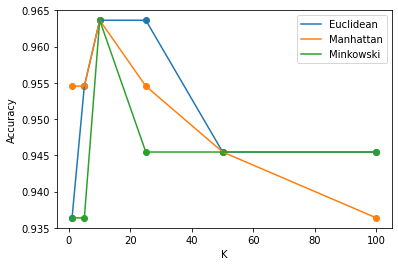

In [72]:
euclid_acc = test_KNN_diff_k(X_bc_train_mat, Y_bc_train_mat, X_bc_val_mat, Y_bc_val_mat,[1,5,10,25,50,100], euclidean_dist)
manhattan_acc = test_KNN_diff_k(X_bc_train_mat, Y_bc_train_mat, X_bc_val_mat, Y_bc_val_mat,[1,5,10,25,50,100], manhattan_dist)
mink_acc = test_KNN_diff_k(X_bc_train_mat, Y_bc_train_mat, X_bc_val_mat, Y_bc_val_mat,[1,5,10,25,50,100], minkowski_dist) # Minkowski distance with p = 3

plt.scatter(euclid_acc[:,0], euclid_acc[:,1])
plt.plot(euclid_acc[:,0], euclid_acc[:,1], label="Euclidean")
plt.scatter(manhattan_acc[:,0], manhattan_acc[:,1])
plt.plot(manhattan_acc[:,0], manhattan_acc[:,1], label="Manhattan")
plt.scatter(mink_acc[:,0], mink_acc[:,1])
plt.plot(mink_acc[:,0], mink_acc[:,1], label="Minkowski")
plt.legend(loc="upper right")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.show()

K=10 has highest accuracy for all 3 distances
- Use K=10 and Euclidean Distance

Our training accuracy:

In [73]:
test_KNN_diff_k(X_bc_train_mat, Y_bc_train_mat, X_bc_train_mat, Y_bc_train_mat, [10], euclidean_dist)

array([[10.        ,  0.97477064]])

Our testing accuracy:

In [74]:
test_KNN_diff_k(X_bc_train_mat, Y_bc_train_mat, X_bc_test_mat, Y_bc_test_mat, [10], euclidean_dist)

array([[10.        ,  0.97810219]])

Plotting the accuracy of different Decision Trees versus their maximum depth (Note: no pruning has occurred)  

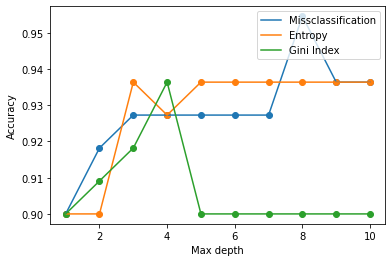

In [75]:
missclass_acc = test_DTree_diff_depth(X_bc_train_mat, Y_bc_train_mat, X_bc_val_mat, Y_bc_val_mat, [1,2,3,4,5,6,7,8,9,10], classification_cost)
entropy_acc = test_DTree_diff_depth(X_bc_train_mat, Y_bc_train_mat, X_bc_val_mat, Y_bc_val_mat, [1,2,3,4,5,6,7,8,9,10], cost_entropy)
gini_acc = test_DTree_diff_depth(X_bc_train_mat, Y_bc_train_mat, X_bc_val_mat, Y_bc_val_mat, [1,2,3,4,5,6,7,8,9,10], cost_gini_index)

plt.scatter(missclass_acc[:,0], missclass_acc[:,1])
plt.plot(missclass_acc[:,0], missclass_acc[:,1], label="Missclassification")
plt.scatter(entropy_acc[:,0], entropy_acc[:,1])
plt.plot(entropy_acc[:,0], entropy_acc[:,1], label="Entropy")
plt.scatter(gini_acc[:,0], gini_acc[:,1])
plt.plot(gini_acc[:,0], gini_acc[:,1], label="Gini Index")
plt.legend(loc="upper right")
plt.xlabel("Max depth")
plt.ylabel("Accuracy")
plt.show()

In [76]:
test_DTree_diff_depth(X_bc_train_mat, Y_bc_train_mat, X_bc_train_mat, Y_bc_train_mat, [4], cost_gini_index)

array([[4.        , 0.98623853]])

In [77]:
test_DTree_diff_depth(X_bc_train_mat, Y_bc_train_mat, X_bc_test_mat, Y_bc_test_mat, [4], cost_gini_index)

array([[4.        , 0.95620438]])

Examining the effect of pruning the tree (With max depth=4)

In [78]:
missclass_pruning = test_DTree_pruning(X_bc_train_mat, Y_bc_train_mat, X_bc_val_mat, Y_bc_val_mat, 4, classification_cost)
entropy_pruning = test_DTree_pruning(X_bc_train_mat, Y_bc_train_mat, X_bc_val_mat, Y_bc_val_mat, 4, cost_entropy)
gini_pruning = test_DTree_pruning(X_bc_train_mat, Y_bc_train_mat, X_bc_val_mat, Y_bc_val_mat, 4, cost_gini_index)

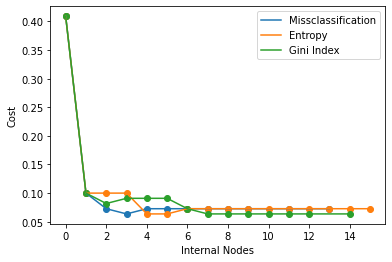

In [79]:
plt.scatter(missclass_pruning[:,0], missclass_pruning[:,1])
plt.plot(missclass_pruning[:,0], missclass_pruning[:,1], label="Missclassification")
plt.scatter(entropy_pruning[:,0], entropy_pruning[:,1])
plt.plot(entropy_pruning[:,0], entropy_pruning[:,1], label="Entropy")
plt.scatter(gini_pruning[:,0], gini_pruning[:,1])
plt.plot(gini_pruning[:,0], gini_pruning[:,1], label="Gini Index")
plt.legend(loc="upper right")
plt.xlabel("Internal Nodes")
plt.ylabel("Cost")
plt.show()

### Hepatitis Dataset

The First One: With the column (ALKPHOSPHATE) 

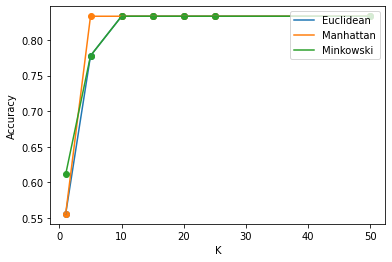

In [80]:
euclid_acc = test_KNN_diff_k(X_train_mat_1, Y_train_mat_1, X_val_mat_1, Y_val_mat_1, [1,5,10,15,20,25,50], euclidean_dist)
manhattan_acc = test_KNN_diff_k(X_train_mat_1, Y_train_mat_1, X_val_mat_1, Y_val_mat_1,[1,5,10,15,20,25,50], manhattan_dist)
mink_acc = test_KNN_diff_k(X_train_mat_1, Y_train_mat_1, X_val_mat_1, Y_val_mat_1,[1,5,10,15,20,25,50], minkowski_dist) # Minkowski distance with p = 3

plt.scatter(euclid_acc[:,0], euclid_acc[:,1])
plt.plot(euclid_acc[:,0], euclid_acc[:,1], label="Euclidean")
plt.scatter(manhattan_acc[:,0], manhattan_acc[:,1])
plt.plot(manhattan_acc[:,0], manhattan_acc[:,1], label="Manhattan")
plt.scatter(mink_acc[:,0], mink_acc[:,1])
plt.plot(mink_acc[:,0], mink_acc[:,1], label="Minkowski")
plt.legend(loc="upper right")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.show()

Manhattan Distance, K=5

Our training accuracy:

In [81]:
test_KNN_diff_k(X_train_mat_1, Y_train_mat_1, X_train_mat_1, Y_train_mat_1, [5], manhattan_dist)

array([[5.        , 0.83098592]])

Our testing accuracy:

In [82]:
test_KNN_diff_k(X_train_mat_1, Y_train_mat_1, X_test_mat_1, Y_test_mat_1, [5], manhattan_dist)

array([[5.       , 0.7826087]])

The Second One (Without the alkphaspate)

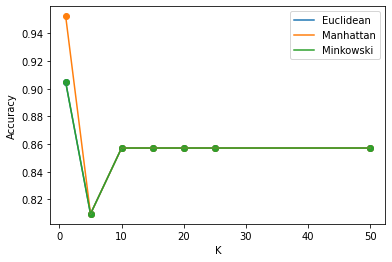

In [83]:
euclid_acc = test_KNN_diff_k(X_train_mat_2, Y_train_mat_2, X_val_mat_2, Y_val_mat_2, [1,5,10,15,20,25,50], euclidean_dist)
manhattan_acc = test_KNN_diff_k(X_train_mat_2, Y_train_mat_2, X_val_mat_2, Y_val_mat_2, [1,5,10,15,20,25,50], manhattan_dist)
mink_acc = test_KNN_diff_k(X_train_mat_2, Y_train_mat_2, X_val_mat_2, Y_val_mat_2, [1,5,10,15,20,25,50], minkowski_dist) # Minkowski distance with p = 3

plt.scatter(euclid_acc[:,0], euclid_acc[:,1])
plt.plot(euclid_acc[:,0], euclid_acc[:,1], label="Euclidean")
plt.scatter(manhattan_acc[:,0], manhattan_acc[:,1])
plt.plot(manhattan_acc[:,0], manhattan_acc[:,1], label="Manhattan")
plt.scatter(mink_acc[:,0], mink_acc[:,1])
plt.plot(mink_acc[:,0], mink_acc[:,1], label="Minkowski")
plt.legend(loc="upper right")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.show()

Any of the distances would do, K=10

Our training accuracy:

In [84]:
test_KNN_diff_k(X_train_mat_2, Y_train_mat_2, X_train_mat_2, Y_train_mat_2, [10], euclidean_dist)

array([[10.        ,  0.84146341]])

Our testing accuracy:

In [85]:
test_KNN_diff_k(X_train_mat_2, Y_train_mat_2, X_test_mat_2, Y_test_mat_2, [10], euclidean_dist)

array([[10.        ,  0.76923077]])

Decision Tree on Set 1 with the column

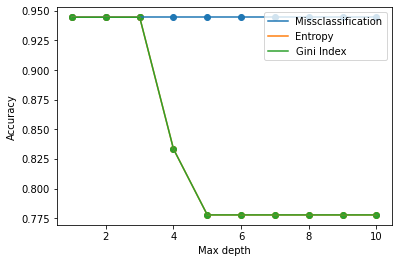

In [86]:
missclass_acc = test_DTree_diff_depth(X_train_mat_1, Y_train_mat_1, X_val_mat_1, Y_val_mat_1, [1,2,3,4,5,6,7,8,9,10], classification_cost)
entropy_acc = test_DTree_diff_depth(X_train_mat_1, Y_train_mat_1, X_val_mat_1, Y_val_mat_1, [1,2,3,4,5,6,7,8,9,10], cost_entropy)
gini_acc = test_DTree_diff_depth(X_train_mat_1, Y_train_mat_1, X_val_mat_1, Y_val_mat_1, [1,2,3,4,5,6,7,8,9,10], cost_gini_index)

plt.scatter(missclass_acc[:,0], missclass_acc[:,1])
plt.plot(missclass_acc[:,0], missclass_acc[:,1], label="Missclassification")
plt.scatter(entropy_acc[:,0], entropy_acc[:,1])
plt.plot(entropy_acc[:,0], entropy_acc[:,1], label="Entropy")
plt.scatter(gini_acc[:,0], gini_acc[:,1])
plt.plot(gini_acc[:,0], gini_acc[:,1], label="Gini Index")
plt.legend(loc="upper right")
plt.xlabel("Max depth")
plt.ylabel("Accuracy")
plt.show()

In [87]:
test_DTree_diff_depth(X_train_mat_1, Y_train_mat_1, X_train_mat_1, Y_train_mat_1, [3], classification_cost)

array([[3.        , 0.90140845]])

In [88]:
test_DTree_diff_depth(X_train_mat_1, Y_train_mat_1, X_test_mat_1, Y_test_mat_1, [3], classification_cost)

array([[3.        , 0.69565217]])

Decision tree with set 2 (No extra column)

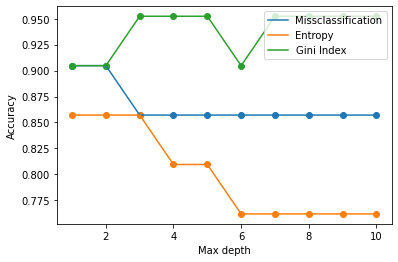

In [89]:
missclass_acc = test_DTree_diff_depth(X_train_mat_2, Y_train_mat_2, X_val_mat_2, Y_val_mat_2, [1,2,3,4,5,6,7,8,9,10], classification_cost)
entropy_acc = test_DTree_diff_depth(X_train_mat_2, Y_train_mat_2, X_val_mat_2, Y_val_mat_2, [1,2,3,4,5,6,7,8,9,10], cost_entropy)
gini_acc = test_DTree_diff_depth(X_train_mat_2, Y_train_mat_2, X_val_mat_2, Y_val_mat_2, [1,2,3,4,5,6,7,8,9,10], cost_gini_index)

plt.scatter(missclass_acc[:,0], missclass_acc[:,1])
plt.plot(missclass_acc[:,0], missclass_acc[:,1], label="Missclassification")
plt.scatter(entropy_acc[:,0], entropy_acc[:,1])
plt.plot(entropy_acc[:,0], entropy_acc[:,1], label="Entropy")
plt.scatter(gini_acc[:,0], gini_acc[:,1])
plt.plot(gini_acc[:,0], gini_acc[:,1], label="Gini Index")
plt.legend(loc="upper right")
plt.xlabel("Max depth")
plt.ylabel("Accuracy")
plt.show()

In [90]:
test_DTree_diff_depth(X_train_mat_2, Y_train_mat_2, X_train_mat_2, Y_train_mat_2, [3], classification_cost)

array([[3.        , 0.90243902]])

In [91]:
test_DTree_diff_depth(X_train_mat_2, Y_train_mat_2, X_test_mat_2, Y_test_mat_2, [3], classification_cost)

array([[3.        , 0.84615385]])

## Decision Boundaries
- TO DO

In [92]:
def plot_decision_boundaries(model, xlabel, ylabel):
    x = model.get_x()
    y = model.get_y()
    x0v = np.linspace(np.min(x[:,0]), np.max(x[:,0]), 200)
    x1v = np.linspace(np.min(x[:,1]), np.max(x[:,1]), 200)
      
    #to features values as a mesh  
    x0, x1 = np.meshgrid(x0v, x1v)
    x_all = np.vstack((x0.ravel(),x1.ravel())).T
      
    plane_preds = model.predict(x_all)

    plt.scatter(x=x[:,0], y=x[:,1], c=y, marker='o')
    plt.scatter(x_all[:,0], x_all[:,1], c=plane_preds[:,0], marker='.', alpha=0.01)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

Breast Cancer Dataset


In [93]:
X_bc_train_val.dtypes

Clump_Thickness                int64
Uniformity_of_Cell_Size        int64
Uniformity_of_Cell_Shape       int64
Marginal_Adhesion              int64
Single_Epithelial_Cell_Size    int64
Bare_Nuclei                    int64
Bland_Chromatin                int64
Normal_Nucleoli                int64
Mitoses                        int64
dtype: object

In [94]:
X_bc_train_val_mat.shape

(546, 9)

In [95]:
bc_knn = KNN(k=10, distance_fct=euclidean_dist)
bc_knn.fit(X_bc_train_val_mat[:,[1,2]],Y_bc_train_val_mat)

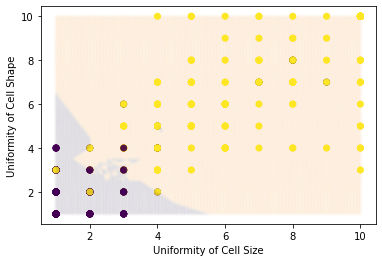

In [96]:
 plot_decision_boundaries(bc_knn,"Uniformity of Cell Size", "Uniformity of Cell Shape")

In [97]:
bc_tree = DecisionTree(cost_fct=cost_gini_index, max_depth=4)
bc_tree.fit(X_bc_train_val_mat[:,[1,2]],Y_bc_train_val_mat)

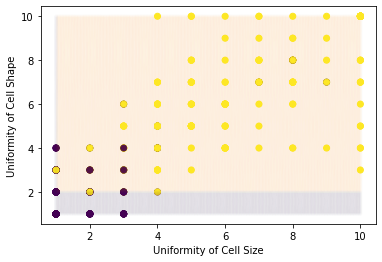

In [98]:
 plot_decision_boundaries(bc_tree,"Uniformity of Cell Size", "Uniformity of Cell Shape")

Hepatitis Dataset

First

In [99]:
X_train_val_1.dtypes

AGE                  int64
SEX                  int64
STEROID              int64
ANTIVIRALS           int64
FATIGUE              int64
MALAISE              int64
ANOREXIA             int64
LIVER_BIG            int64
LIVER_FIRM           int64
SPLEEN_PALPABLE      int64
SPIDERS              int64
ASCITES              int64
VARICES              int64
BILIRUBIN          float64
ALK_PHOSPHATE        int64
SGOT                 int64
ALBUMIN            float64
HISTOLOGY            int64
dtype: object

In [100]:
X_train_val_mat_1.shape

(89, 18)

In [101]:
knn_1 = KNN(k=5, distance_fct=manhattan_dist)
knn_1.fit(X_train_val_mat_1[:,[13,16]],Y_train_val_mat_1)

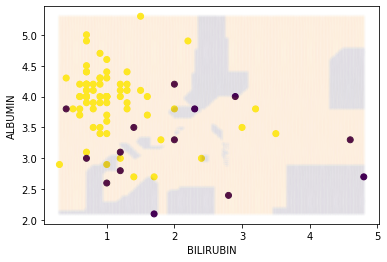

In [102]:
 plot_decision_boundaries(knn_1, "BILIRUBIN", "ALBUMIN")

In [103]:
tree_1 = DecisionTree(cost_fct=classification_cost, max_depth=3)
tree_1.fit(X_train_val_mat_1[:,[13,16]],Y_train_val_mat_1)


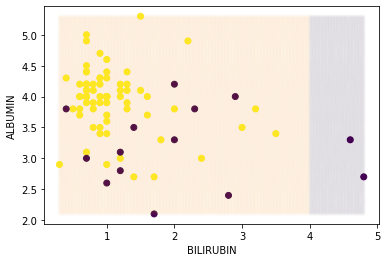

In [104]:
 plot_decision_boundaries(tree_1,"BILIRUBIN","ALBUMIN")

Second

In [105]:
X_train_val_2.dtypes

AGE                  int64
SEX                  int64
STEROID              int64
ANTIVIRALS           int64
FATIGUE              int64
MALAISE              int64
ANOREXIA             int64
LIVER_BIG            int64
LIVER_FIRM           int64
SPLEEN_PALPABLE      int64
SPIDERS              int64
ASCITES              int64
VARICES              int64
BILIRUBIN          float64
SGOT                 int64
ALBUMIN            float64
HISTOLOGY            int64
dtype: object

In [106]:
X_train_val_mat_2.shape

(103, 17)

In [107]:
knn_2 = KNN(k=10, distance_fct=euclidean_dist)
knn_2.fit(X_train_val_mat_2[:,[13,15]],Y_train_val_mat_2)

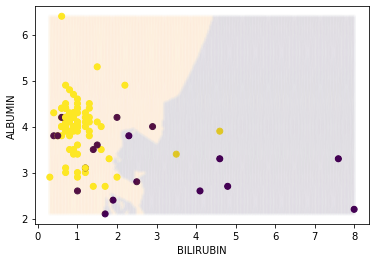

In [108]:
 plot_decision_boundaries(knn_2, "BILIRUBIN","ALBUMIN")

In [109]:
tree_2 = DecisionTree(cost_fct=classification_cost, max_depth=3)
tree_2.fit(X_train_val_mat_2[:,[13,15]],Y_train_val_mat_2)

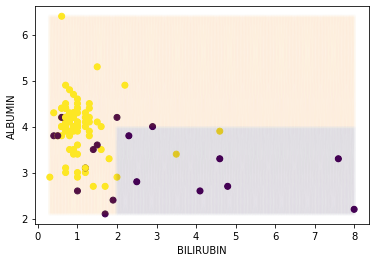

In [110]:
 plot_decision_boundaries(tree_2, "BILIRUBIN","ALBUMIN")